In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy import linalg as LA 

## importando o arquivo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Ufop/Ufop2020_1/Avaliação_Sistemas/Provas/Prova_3/log.csv', header=0, sep='\t')

## Criando a amostra

In [ ]:
sample = df.sample(10000)
sample.head()

,type,size,time
175163,.ps,184.00,0.45
3661,.tar.gz,1293.05,3.07
55350,.tar.gz,1093.47,2.75
122527,.ps,238.00,0.52
25135,.tar.gz,1166.59,2.87


In [ ]:
sample2=sample
sample2.head()

,type,size,time
175163,.ps,184.00,0.45
3661,.tar.gz,1293.05,3.07
55350,.tar.gz,1093.47,2.75
122527,.ps,238.00,0.52
25135,.tar.gz,1166.59,2.87


In [ ]:
#.ps -> 0
#.tar.gz -> 1
sample2['type']=sample2['type'].replace(['.ps','.tar.gz'],[0,1])
sample2

,type,size,time
175163,0,184.00,0.45
3661,1,1293.05,3.07
55350,1,1093.47,2.75
122527,0,238.00,0.52
25135,1,1166.59,2.87
...,...,...,...
35871,0,538.00,0.92
61990,1,31000.60,6.09
26340,1,1041.67,2.67
89597,1,970.12,2.55


In [ ]:
sample2.groupby('type').count()

,size,time
type,,
0,4023,4023
1,5977,5977


## (a) informações básicas de estatísticas de cada ***feature***

In [ ]:
sample2.describe()

,type,size,time
count,10000.000000,10000.000000,10000.000000
mean,0.597700,3697.073750,2.261566
std,0.490386,9188.078588,1.721814
min,0.000000,29.780000,0.130000
25%,0.000000,357.000000,0.680000
50%,1.000000,970.920000,2.550000
75%,1.000000,1206.342500,2.930000
max,1.000000,101190.040000,8.540000


In [ ]:
print('Variância')
sample2.var()

Variância


type    2.404788e-01
size    8.442079e+07
time    2.964644e+00
dtype: float64

In [ ]:
print('Coeficiente de variação')
sample2.std()/sample2.mean()

Coeficiente de variação


type    0.820456
size    2.485230
time    0.761337
dtype: float64

In [ ]:
print('Soma')
sample2[['size', 'time', 'type']].sum()

Soma


size    36970737.50
time       22615.66
type        5977.00
dtype: float64

In [ ]:
print('Range')
sample2[['size', 'time', 'type']].max()-sample[['size', 'time','type']].min()

Range


size    101160.26
time         8.41
type         1.00
dtype: float64

## (b) gráficos das ***features***

In [ ]:
plt.figure(figsize=(9,6))
# plt.style.use('ggplot')

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'time (s)')

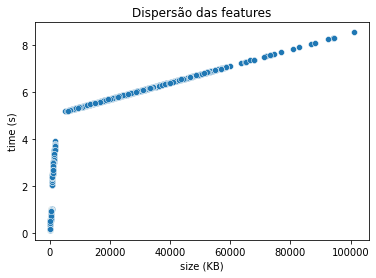

In [ ]:
sns.scatterplot('size', 'time', data=sample)
plt.title('Dispersão das features')
plt.xlabel('size (KB)')
plt.ylabel('time (s)')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Dispersão das features')

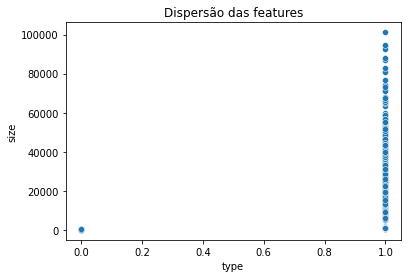

In [ ]:
sns.scatterplot('type','size',data=sample2)
plt.title('Dispersão das features')
# plt.xlabel('size (KB)')
# plt.ylabel('time (s)')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Dispersão das features')

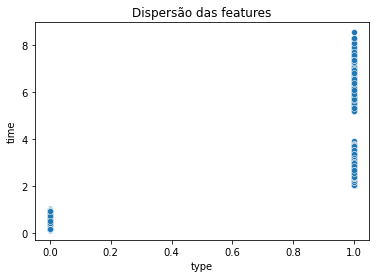

In [ ]:
sns.scatterplot('type','time',data=sample2)
plt.title('Dispersão das features')

Text(0.5, 0, 'time (s)')

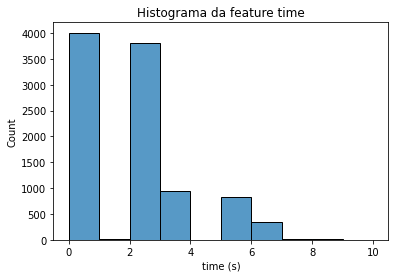

In [ ]:
sns.histplot(sample, x='time',bins=[0,1,2,3,4,5,6,7,8,9,10])
plt.title('Histograma da feature time')
plt.xlabel('time (s)')

Text(0.5, 0, 'type')

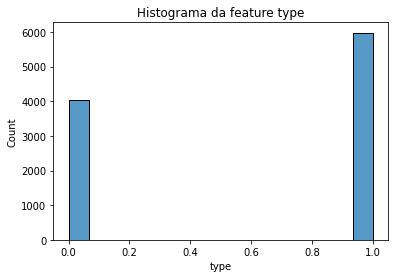

In [ ]:
sns.histplot(sample2, x='type',)
plt.title('Histograma da feature type')
plt.xlabel('type')

In [ ]:
# sample['time'].plot.hist()
# sample['size'].plot.hist()
# sample.plot.scatter('size', 'time')

Text(0.5, 0, 'size (KB)')

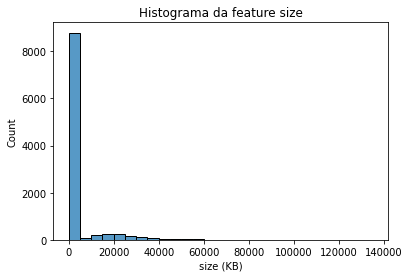

In [ ]:
sns.histplot(sample, x='size', bins=range(0,140000,5000))
plt.title('Histograma da feature size')
plt.xlabel('size (KB)')

Text(0.5, 0, 'time (s)')

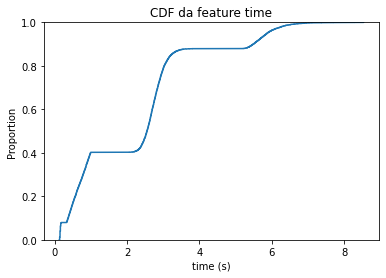

In [ ]:
sns.ecdfplot(sample, x='time')
plt.title('CDF da feature time')
plt.xlabel('time (s)')

Text(0.5, 0, 'type')

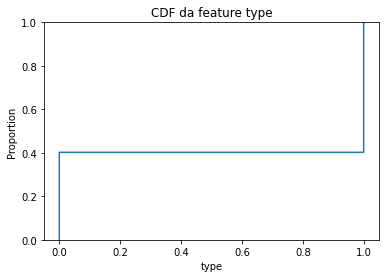

In [ ]:
sns.ecdfplot(sample, x='type')
plt.title('CDF da feature type')
plt.xlabel('type')

Text(0.5, 0, 'size (KB)')

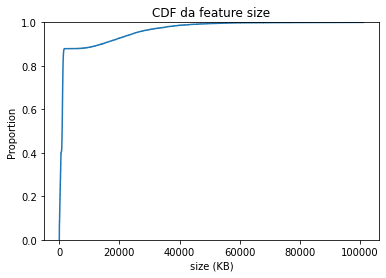

In [ ]:
sns.ecdfplot(sample, x='size')
plt.title('CDF da feature size')
plt.xlabel('size (KB)')

Text(0.5, 1.0, 'Boxplot da feature time')

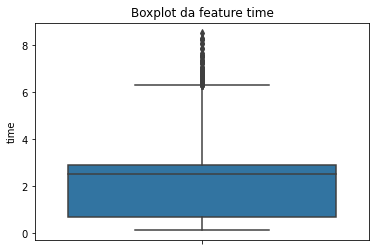

In [ ]:
sns.boxplot(y=sample['time'])
plt.title('Boxplot da feature time')

Text(0.5, 1.0, 'Boxplot da feature type')

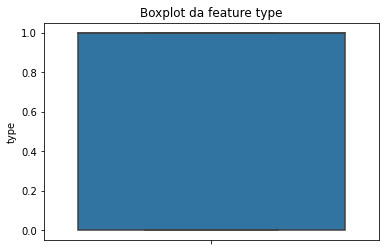

In [ ]:
sns.boxplot(y=sample['type'])
plt.title('Boxplot da feature type')

Text(0.5, 1.0, 'Boxplot da feature size')

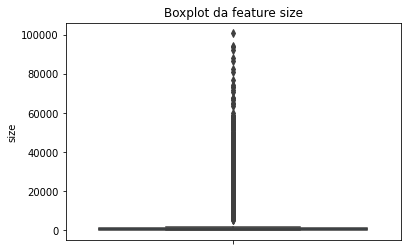

In [ ]:
sns.boxplot(y=sample['size'])
plt.title('Boxplot da feature size')

## análise de transformação de dados

In [ ]:
sample.min()

type     0.00
size    29.78
time     0.13
dtype: float64

In [ ]:
sample.max()

type         1.00
size    101190.04
time         8.54
dtype: float64

In [ ]:
0.13/132920

9.780318988865484e-07

In [ ]:
132920/0.13

1022461.5384615384

In [ ]:
import math

In [ ]:
transformed_sample = sample[['size', 'time']].applymap(lambda x: math.log10(x))
transformed_sample['type'] = sample2['type']
transformed_sample

,size,time,type
175163,2.264818,-0.346787,0
3661,3.111615,0.487138,1
55350,3.038807,0.439333,1
122527,2.376577,-0.283997,0
25135,3.066918,0.457882,1
...,...,...,...
35871,2.730782,-0.036212,0
61990,4.491370,0.784617,1
26340,3.017730,0.426511,1
89597,2.986825,0.406540,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'time (s)')

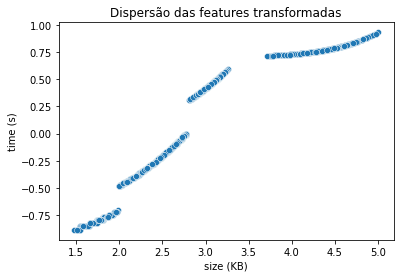

In [ ]:
sns.scatterplot('size', 'time', data=transformed_sample)
plt.title('Dispersão das features transformadas')
plt.xlabel('size (KB)')
plt.ylabel('time (s)')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Dispersão das features transformadas')

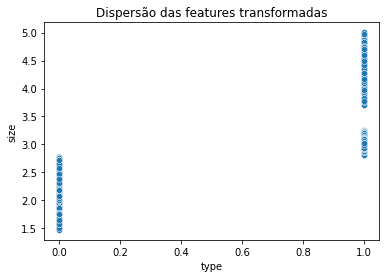

In [ ]:
sns.scatterplot('type', 'size', data=transformed_sample)
plt.title('Dispersão das features transformadas')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Dispersão das features transformadas')

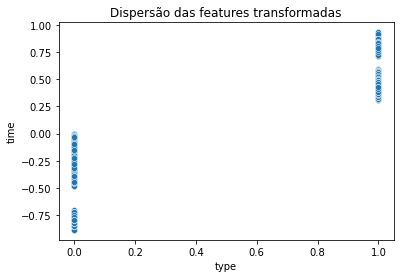

In [ ]:
sns.scatterplot('type','time', data=transformed_sample)
plt.title('Dispersão das features transformadas')

## Principal Component Analysis (PCA)

### 1º passo - cálculo da média e desvio padrão

In [ ]:
transformed_sample.describe()

,size,time,type
count,10000.000000,10000.000000,10000.000000
mean,2.918638,0.174623,0.597700
std,0.668382,0.453652,0.490386
min,1.473925,-0.886057,0.000000
25%,2.552668,-0.167491,0.000000
50%,2.987183,0.406540,1.000000
75%,3.081471,0.466868,1.000000
max,5.005138,0.931458,1.000000


### 2º passo - normalização dos dados para média 0 e desvio padrão 1

In [ ]:
normalized_sample = (transformed_sample-transformed_sample.mean())/transformed_sample.std()
normalized_sample.describe()

,size,time,type
count,1.000000e+04,1.000000e+04,1.000000e+04
mean,-2.704642e-16,3.905098e-15,6.954215e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.161508e+00,-2.338093e+00,-1.218835e+00
25%,-5.475454e-01,-7.541343e-01,-1.218835e+00
50%,1.025546e-01,5.112227e-01,8.203736e-01
75%,2.436224e-01,6.442045e-01,8.203736e-01
max,3.121717e+00,1.668317e+00,8.203736e-01


### 3º passo - Correlação entre as variáveis

In [ ]:
correlation = normalized_sample.corr()
correlation

,size,time,type
size,1.000000,0.902451,0.706036
time,0.902451,1.000000,0.895279
type,0.706036,0.895279,1.000000


### 4º passo - Matriz de correlação

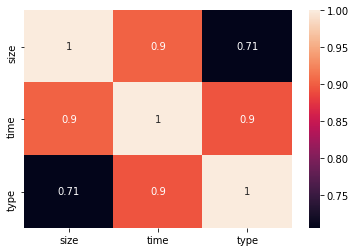

In [ ]:
sns.heatmap(correlation, 
        xticklabels=correlation.columns,
        yticklabels=correlation.columns,
        annot=True)

### 5º passo - Cálculo dos autovalores

In [ ]:
eigenvalues, eigenvectors = LA.eig(correlation)
eigenvalues

array([2.67231615, 0.29402241, 0.03366144])

### 6º passo - Cálculo dos autovetores

In [ ]:
eigenvectors

array([[-0.56384562, -0.6996587 ,  0.43881184],
       [-0.6051535 , -0.01156558, -0.7960248 ],
       [-0.56202079,  0.71438361,  0.41687971]])

### 7º passo - Cálculo dos fatores principais

In [ ]:
principal_factor = np.matmul(normalized_sample,eigenvectors)
principal_factor

,size,time,type
175163,1.932113,-0.173008,-0.022437
3661,-1.040745,0.376086,-0.079680
55350,-0.915553,0.453521,-0.043596
122527,1.754073,-0.291597,-0.059243
25135,-0.964012,0.423621,-0.057688
...,...,...,...
35871,1.124731,-0.668694,-0.261486
61990,-2.601529,-1.075817,0.304181
26340,-0.880670,0.475910,-0.034935
89597,-0.827958,0.508770,-0.020182


### 8º passo - Soma e soma dos quadrados do principal fator

In [ ]:
sum_pf = principal_factor.sum()
sum_pf

size   -2.225975e-11
time    9.399703e-13
type   -3.255585e-11
dtype: float64

In [ ]:
sum_square_pf = (principal_factor**2).sum()
sum_square_pf

size    26720.489224
time     2939.930058
type      336.580719
dtype: float64

In [ ]:
sum_total = sum_square_pf.sum()
sum_total

29996.999999999596

In [ ]:
size_impact = sum_square_pf['size']/sum_total
size_impact

0.8907720513339817

In [ ]:
time_impact = sum_square_pf['time']/sum_total
time_impact

0.09800746933070753

In [ ]:
type_impact = sum_square_pf['type']/sum_total
type_impact

0.011220479335310831

In [ ]:
def applyPercentage(l):
	return list( map(lambda x: x * 100, l) )
 
percentages = applyPercentage([size_impact, time_impact, type_impact])
percentages

[89.07720513339818, 9.800746933070753, 1.1220479335310831]

([<matplotlib.patches.Wedge at 0x7f6aab670400>,
 [Text(-0.40374562881923076, -1.1300395865673751, 'size'),
  Text(0.40637707208444673, 1.022182799348567, 'time'),
  Text(0.03876673569781333, 1.0993166696649952, 'type')],
 [Text(-0.23551828347788462, -0.6591897588309688, '89.1%'),
  Text(0.22166022113697093, 0.5575542541901274, '9.8%'),
  Text(0.021145492198807268, 0.5996272743627246, '1.1%')])

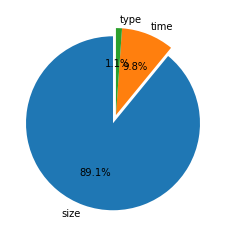

In [ ]:
explode = (0.1,0,0)
plt.pie(percentages,labels=['size', 'time', 'type'],explode=explode,autopct='%1.1f%%', startangle=90)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


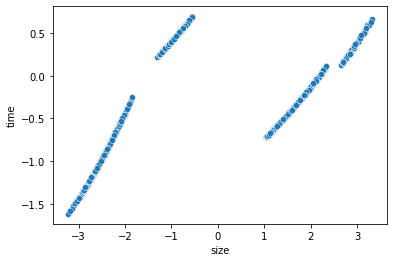

In [ ]:
sns.scatterplot( 'size','time', data=principal_factor)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


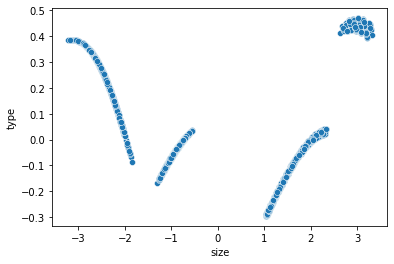

In [ ]:
sns.scatterplot( 'size','type', data=principal_factor)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


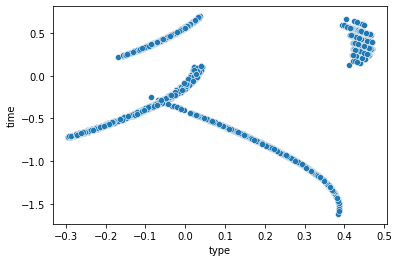

In [ ]:
sns.scatterplot('type', 'time', data=principal_factor)

[0.88684997 0.10427057 0.00887946]


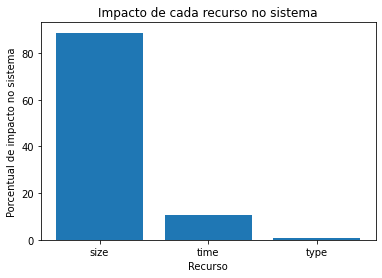

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

pca.fit(transformed_sample)
percentages = pca.explained_variance_ratio_
print(percentages)

plt.clf()
plt.bar(['size', 'time','type'], applyPercentage(percentages) )
plt.xlabel('Recurso')
plt.ylabel('Porcentual de impacto no sistema')
plt.title('Impacto de cada recurso no sistema')
plt.show()
plt.clf()


## Análise para clusterização

### selecão das ***features*** que mais influenciam no sistema através da análise do PCA

In [ ]:
df_cluster = transformed_sample[['size','time']]
df_cluster['type'] = transformed_sample['type']
df_cluster.head()

,size,time,type
175163,2.264818,-0.346787,0
3661,3.111615,0.487138,1
55350,3.038807,0.439333,1
122527,2.376577,-0.283997,0
25135,3.066918,0.457882,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


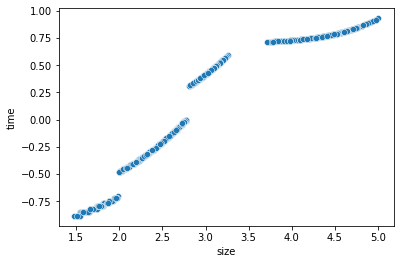

In [ ]:
sns.scatterplot('size', 'time', data=df_cluster)

### aplicação da escala nos dados

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster[['size','time']])

In [ ]:
df_scaled[:10]

array([[-0.97826175, -1.14942108],
       [ 0.28873778,  0.68892251],
       [ 0.17979997,  0.58353752],
       [-0.81104495, -1.01100216],
       [ 0.22186091,  0.62442821],
       [ 1.44213858,  1.20624452],
       [ 2.12617673,  1.29302293],
       [ 0.30461822,  0.70438937],
       [ 1.80895699,  1.24190519],
       [-0.51043115, -0.72642002]])

In [ ]:
df_2=pd.DataFrame(df_scaled,columns=['size','time'])

In [ ]:
df_2.mean()

size   -2.712414e-16
time   -2.357003e-17
dtype: float64

In [ ]:
df_2.std()

size    1.00005
time    1.00005
dtype: float64

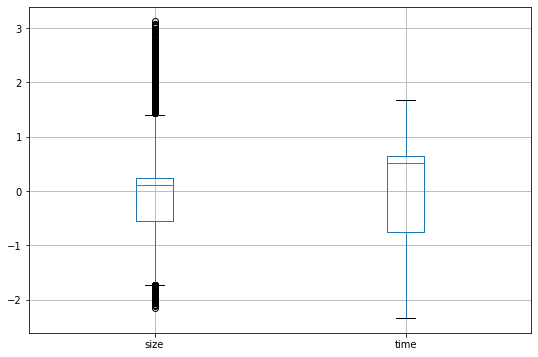

In [ ]:
plt.figure(figsize=(9,6))
df_2.boxplot(column=['size','time'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


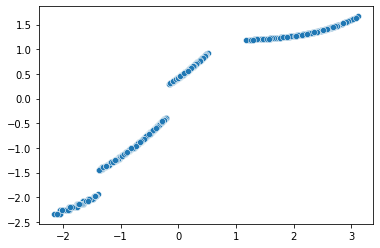

In [ ]:
sns.scatterplot(df_scaled[:,0], df_scaled[:,1], data=df_cluster)

### função para calcular a ***distância inter e intra clusters***

In [ ]:
def k_intra_distance(data, cx, cy, i_centroid, cluster_labels):
  distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x,y) in data[cluster_labels == i_centroid]]
  return np.mean(distances)

In [ ]:
def k_inter_distance(centroids):
  total_distances = []
  for (cx, cy) in centroids:
    distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x,y) in centroids]
    total_distances.extend(distances)
  total_distances_filter = list(filter(lambda a: a!=0, total_distances)) #remove os 0's
  return list(dict.fromkeys(total_distances_filter)) #remove as duplicatas

### encontrando o número ***k*** de clusters

In [ ]:
inter_distances = []
intra_distances = []
beta_distances = []
clusters_vec = []
kmeans_vec = []
centroids_vec = []
total_clusters = np.arange(3,11)

for i in range(3,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_vec.append(kmeans)

  clusters = kmeans.fit_predict(df_scaled)
  clusters_vec.append(clusters)

  centroids = kmeans.cluster_centers_ 
  centroids_vec.append(centroids)

  mean_inter_distance = k_inter_distance(centroids)
  df_inter_distance = pd.DataFrame(mean_inter_distance, columns=['distance'])
  cv_inter = df_inter_distance['distance'].std()/df_inter_distance['distance'].mean()
  inter_distances.append(cv_inter)

  mean_intra_distance = []
  for i, (c_x, c_y) in enumerate(centroids):
    mean_distance = k_intra_distance(df_scaled, c_x, c_y, i, clusters)
    mean_intra_distance.append(mean_distance)
  df_intra_distance = pd.DataFrame(mean_intra_distance, columns=['distance'])
  cv_intra = df_intra_distance['distance'].std()/df_intra_distance['distance'].mean()
  intra_distances.append(cv_intra)

  cv_beta = cv_intra/cv_inter
  beta_distances.append(cv_beta)

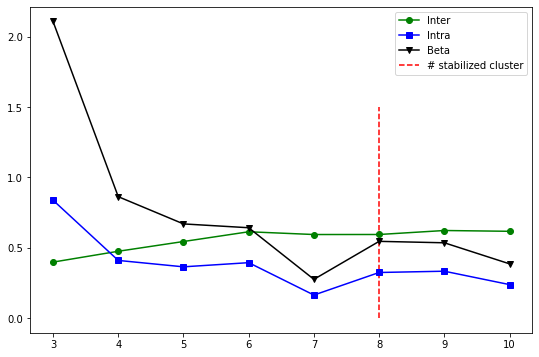

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(total_clusters, inter_distances, marker='o', label='Inter', color='green')
plt.plot(total_clusters, intra_distances, marker='s', label='Intra', color='blue')
plt.plot(total_clusters, beta_distances, marker='v', label='Beta', color='black')
plt.vlines(x=8, ymin=0, ymax=1.5, colors='red', linestyles='dashed', label='# stabilized cluster')
plt.legend()

### gráfico da clusterização com o ***k*** ideal nos dados escalados



Text(0, 0.5, 'time')

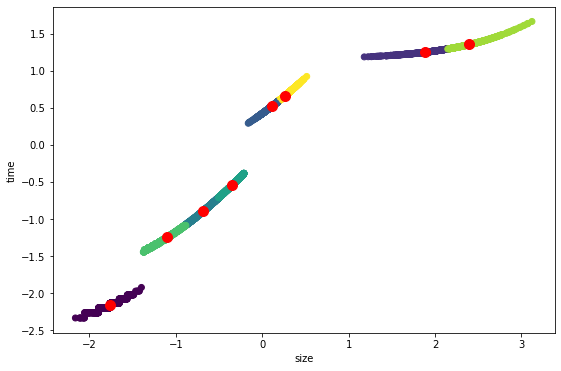

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(df_scaled[:,0], df_scaled[:,1], c=clusters_vec[5])
plt.scatter(centroids_vec[5][:,0], centroids_vec[5][:,1], s=100, c='red')
plt.xlabel('size')
plt.ylabel('time')

Text(0, 0.5, 'time')

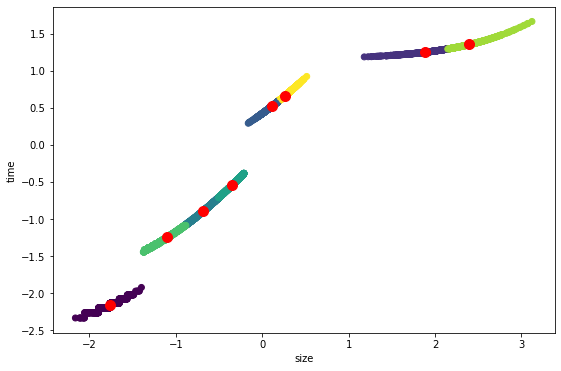

In [ ]:
kmeans2 = KMeans(n_clusters=8, init='k-means++', random_state=42)
clusters2 = kmeans2.fit_predict(df_scaled)
plt.figure(figsize=(9,6))
plt.scatter(df_scaled[:,0], df_scaled[:,1], c=clusters2)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], s=100, c='red')
plt.xlabel('size')
plt.ylabel('time')

### gráfico da clusterização com o ***k*** ideal nos dados transformados

Text(0, 0.5, 'time')

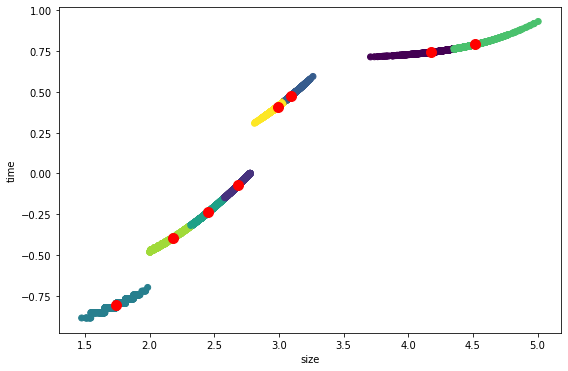

In [ ]:
kmeans3 = KMeans(n_clusters=8, init='k-means++', random_state=42)
clusters3 = kmeans3.fit_predict(df_cluster)
plt.figure(figsize=(9,6))
plt.scatter(df_cluster['size'], df_cluster['time'], c=clusters3)
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s=100, c='red')
plt.xlabel('size')
plt.ylabel('time')

Text(0, 0.5, 'time')

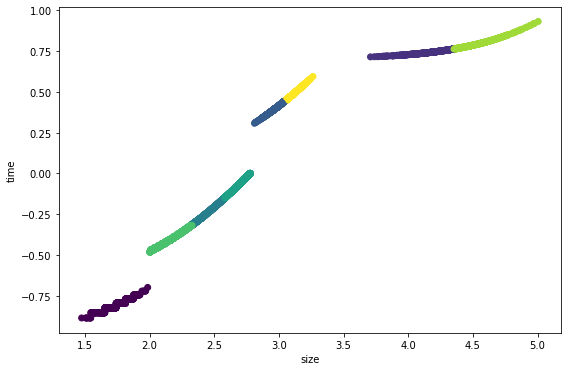

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(df_cluster['size'], df_cluster['time'], c=clusters_vec[5])
# plt.scatter(kmeans_vec[5].cluster_centers_[:,0], kmeans_vec[5].cluster_centers_[:,1], s=100, c='red')
plt.xlabel('size')
plt.ylabel('time')

### população dos clusters

In [ ]:
np.bincount(clusters_vec[5])

array([ 795,  595, 2497, 1042, 1397,  789,  614, 2271])

### cálculo dos centróides nos dados originais a partir dos dados escalados

In [ ]:
centroids_x = 10 ** ((centroids_vec[5][:,0] * df_cluster[['size','time']].std()['size']) + df_cluster[['size','time']].mean()['size'])
centroids_x

array([   54.91288308, 15154.81520461,   981.47020517,   290.08666552,
         486.56921656,   153.44494931, 33025.597801  ,  1248.67211433])

In [ ]:
centroids_y = 10 ** ((centroids_vec[5][:,1] * df_cluster[['size','time']].std()['time']) + df_cluster[['size','time']].mean()['time'])
centroids_y

array([0.15553554, 5.55139395, 2.57307813, 0.58852817, 0.85002257,
       0.40693419, 6.19843342, 3.00044998])

In [ ]:
centroids_originais = [[x,y] for x,y in zip(centroids_x,centroids_y)]
centroids_originais = np.array(centroids_originais)
centroids_originais

array([[5.49128831e+01, 1.55535543e-01],
       [1.51548152e+04, 5.55139395e+00],
       [9.81470205e+02, 2.57307813e+00],
       [2.90086666e+02, 5.88528175e-01],
       [4.86569217e+02, 8.50022572e-01],
       [1.53444949e+02, 4.06934193e-01],
       [3.30255978e+04, 6.19843342e+00],
       [1.24867211e+03, 3.00044998e+00]])

### plote do gráfico de dispersão dos dados originais

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'time (s)')

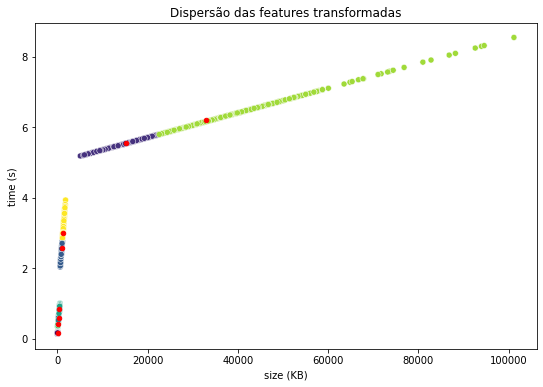

In [ ]:
plt.figure(figsize=(9,6))
sns.scatterplot('size', 'time', data=sample, c=clusters_vec[5])
plt.scatter(centroids_originais[:,0], centroids_originais[:,1], s=20, c='red')
plt.title('Dispersão das features transformadas')
plt.xlabel('size (KB)')
plt.ylabel('time (s)')

### nomeando os centróides

Text(0, 0.5, 'time (s)')

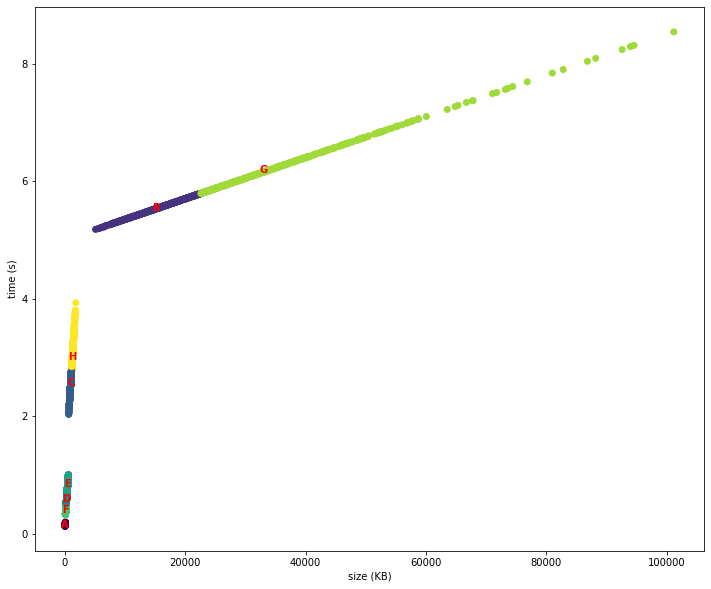

In [ ]:
plt.figure(figsize=(12,10))
groups = {'A': (5.49128831e+01, 1.55535543e-01),
         'B': (1.51548152e+04, 5.55139395e+00),
         'C': (9.81470205e+02, 2.57307813e+00),
         'D': (2.90086666e+02, 5.88528175e-01),
         'E': (4.86569217e+02, 8.50022572e-01),
         'F': (1.53444949e+02, 4.06934193e-01),
         'G': (3.30255978e+04, 6.19843342e+00),
         'H': (1.24867211e+03, 3.00044998e+00)}

for label,values in zip(groups.keys(),groups.values()):
  plt.annotate(label, 
               xy=(values[0],values[1]), 
               xytext=(values[0],values[1]), 
               size=10, 
               weight='bold', 
               color='red', 
               horizontalalignment='center',
               verticalalignment='center')
plt.scatter('size', 'time', data=sample, c=clusters_vec[5])
plt.xlabel('size (KB)')
plt.ylabel('time (s)')

### sumarização dos clusters

In [ ]:
centroids_originais

array([[5.49128831e+01, 1.55535543e-01],
       [1.51548152e+04, 5.55139395e+00],
       [9.81470205e+02, 2.57307813e+00],
       [2.90086666e+02, 5.88528175e-01],
       [4.86569217e+02, 8.50022572e-01],
       [1.53444949e+02, 4.06934193e-01],
       [3.30255978e+04, 6.19843342e+00],
       [1.24867211e+03, 3.00044998e+00]])

In [ ]:
 for i in range(8):
  print(10 ** (((centroids_vec[5][i][0]) * df_cluster[['size','time']].std()['size']) + df_cluster[['size','time']].mean()['size']))
  print(sum(kmeans_vec[5].labels_==i))
  print('\n')

54.91288307668778
795


15154.815204610137
595


981.4702051708349
2497


290.0866655189409
1042


486.5692165626438
1397


153.4449493090825
789


33025.59780100349
614


1248.6721143251436
2271




In [ ]:
clusterA = sample[kmeans_vec[5].labels_==0]
clusterB = sample[kmeans_vec[5].labels_==1]
clusterC = sample[kmeans_vec[5].labels_==2]
clusterD = sample[kmeans_vec[5].labels_==3]
clusterE = sample[kmeans_vec[5].labels_==4]
clusterF = sample[kmeans_vec[5].labels_==5]
clusterG = sample[kmeans_vec[5].labels_==6]
clusterH = sample[kmeans_vec[5].labels_==7]


In [ ]:
# for c in range(0, 8):
#   print("\n\nCluster %i\n" % (c+1))
#   print(sample[kmeans_vec[5].labels_==c].describe())

In [ ]:
print(clusterA.describe())
print('\n')
print('Variancia')
print(clusterA.var())
print('\n')
print('CV')
print(clusterA.std()/clusterA.mean())
print('\n')
print('soma')
print(clusterA.sum())
print('\n')
print('range')
print(clusterA.max()-clusterA.min())

        type        size        time
count  795.0  795.000000  795.000000
mean     0.0   55.976679    0.155950
std      0.0   10.969859    0.011198
min      0.0   29.780000    0.130000
25%      0.0   48.280000    0.150000
50%      0.0   55.150000    0.160000
75%      0.0   62.680000    0.160000
max      0.0   96.490000    0.200000


Variancia
type      0.000000
size    120.337803
time      0.000125
dtype: float64


CV
type         NaN
size    0.195972
time    0.071803
dtype: float64


soma
type        0.00
size    44501.46
time      123.98
dtype: float64


range
type     0.00
size    66.71
time     0.07
dtype: float64


In [ ]:
print(clusterB.describe())
print('\n')
print('Variancia')
print(clusterB.var())
print('\n')
print('CV')
print(clusterB.std()/clusterB.mean())
print('\n')
print('soma')
print(clusterB.sum())
print('\n')
print('range')
print(clusterB.max()-clusterB.min())

        type          size        time
count  595.0    595.000000  595.000000
mean     1.0  15720.790101    5.550235
std      0.0   4196.632425    0.147087
min      1.0   5107.270000    5.180000
25%      1.0  12552.375000    5.440000
50%      1.0  16003.710000    5.560000
75%      1.0  19219.905000    5.670000
max      1.0  22406.220000    5.780000


Variancia
type    0.000000e+00
size    1.761172e+07
time    2.163462e-02
dtype: float64


CV
type    0.000000
size    0.266948
time    0.026501
dtype: float64


soma
type        595.00
size    9353870.11
time       3302.39
dtype: float64


range
type        0.00
size    17298.95
time        0.60
dtype: float64


In [ ]:
print(clusterC.describe())
print('\n')
print('Variancia')
print(clusterC.var())
print('\n')
print('CV')
print(clusterC.std()/clusterC.mean())
print('\n')
print('soma')
print(clusterC.sum())
print('\n')
print('range')
print(clusterC.max()-clusterC.min())

         type         size         time
count  2497.0  2497.000000  2497.000000
mean      1.0   983.844726     2.574121
std       0.0    87.175426     0.139534
min       1.0   646.850000     2.030000
25%       1.0   926.380000     2.480000
50%       1.0   998.710000     2.600000
75%       1.0  1053.360000     2.690000
max       1.0  1109.270000     2.770000


Variancia
type       0.000000
size    7599.554834
time       0.019470
dtype: float64


CV
type    0.000000
size    0.088607
time    0.054206
dtype: float64


soma
type       2497.00
size    2456660.28
time       6427.58
dtype: float64


range
type      0.00
size    462.42
time      0.74
dtype: float64


In [ ]:
print(clusterD.describe())
print('\n')
print('Variancia')
print(clusterD.var())
print('\n')
print('CV')
print(clusterD.std()/clusterD.mean())
print('\n')
print('soma')
print(clusterD.sum())
print('\n')
print('range')
print(clusterD.max()-clusterD.min())

         type         size         time
count  1042.0  1042.000000  1042.000000
mean      0.0   294.005758     0.591987
std       0.0    47.607565     0.063610
min       0.0   214.000000     0.490000
25%       0.0   252.000000     0.540000
50%       0.0   295.000000     0.590000
75%       0.0   333.000000     0.640000
max       0.0   378.000000     0.700000


Variancia
type       0.000000
size    2266.480274
time       0.004046
dtype: float64


CV
type         NaN
size    0.161927
time    0.107453
dtype: float64


soma
type         0.00
size    306354.00
time       616.85
dtype: float64


range
type      0.00
size    164.00
time      0.21
dtype: float64


In [ ]:
print(clusterE.describe())
print('\n')
print('Variancia')
print(clusterE.var())
print('\n')
print('CV')
print(clusterE.std()/clusterE.mean())
print('\n')
print('soma')
print(clusterE.sum())
print('\n')
print('range')
print(clusterE.max()-clusterE.min())

         type         size         time
count  1397.0  1397.000000  1397.000000
mean      0.0   490.637795     0.854159
std       0.0    62.655690     0.083486
min       0.0   379.000000     0.710000
25%       0.0   436.000000     0.780000
50%       0.0   493.000000     0.860000
75%       0.0   544.000000     0.930000
max       0.0   599.000000     1.000000


Variancia
type       0.000000
size    3925.735476
time       0.006970
dtype: float64


CV
type         NaN
size    0.127703
time    0.097740
dtype: float64


soma
type         0.00
size    685421.00
time      1193.26
dtype: float64


range
type      0.00
size    220.00
time      0.29
dtype: float64


In [ ]:
print(clusterF.describe())
print('\n')
print('Variancia')
print(clusterF.var())
print('\n')
print('CV')
print(clusterF.std()/clusterF.mean())
print('\n')
print('soma')
print(clusterF.sum())
print('\n')
print('range')
print(clusterF.max()-clusterF.min())

        type        size        time
count  789.0  789.000000  789.000000
mean     0.0  157.003802    0.409328
std      0.0   32.872986    0.043852
min      0.0  100.000000    0.330000
25%      0.0  128.000000    0.370000
50%      0.0  157.000000    0.410000
75%      0.0  185.000000    0.450000
max      0.0  213.000000    0.480000


Variancia
type       0.000000
size    1080.633234
time       0.001923
dtype: float64


CV
type         NaN
size    0.209377
time    0.107132
dtype: float64


soma
type         0.00
size    123876.00
time       322.96
dtype: float64


range
type      0.00
size    113.00
time      0.15
dtype: float64


In [ ]:
print(clusterG.describe())
print('\n')
print('Variancia')
print(clusterG.var())
print('\n')
print('CV')
print(clusterG.std()/clusterG.mean())
print('\n')
print('soma')
print(clusterG.sum())
print('\n')
print('range')
print(clusterG.max()-clusterG.min())

        type           size        time
count  614.0     614.000000  614.000000
mean     1.0   34459.612443    6.206189
std      0.0   11961.923371    0.418758
min      1.0   22464.450000    5.790000
25%      1.0   25934.767500    5.910000
50%      1.0   30995.455000    6.085000
75%      1.0   38900.497500    6.360000
max      1.0  101190.040000    8.540000


Variancia
type    0.000000e+00
size    1.430876e+08
time    1.753584e-01
dtype: float64


CV
type    0.000000
size    0.347129
time    0.067474
dtype: float64


soma
type         614.00
size    21158202.04
time        3810.60
dtype: float64


range
type        0.00
size    78725.59
time        2.75
dtype: float64


In [ ]:
print(clusterH.describe())
print('\n')
print('Variancia')
print(clusterH.var())
print('\n')
print('CV')
print(clusterH.std()/clusterH.mean())
print('\n')
print('soma')
print(clusterH.sum())
print('\n')
print('range')
print(clusterH.max()-clusterH.min())

         type         size         time
count  2271.0  2271.000000  2271.000000
mean      1.0  1251.366187     3.002219
std       0.0   115.026059     0.184047
min       1.0  1109.580000     2.780000
25%       1.0  1161.920000     2.860000
50%       1.0  1224.260000     2.960000
75%       1.0  1312.145000     3.100000
max       1.0  1832.240000     3.930000


Variancia
type        0.000000
size    13230.994163
time        0.033873
dtype: float64


CV
type    0.000000
size    0.091920
time    0.061304
dtype: float64


soma
type       2271.00
size    2841852.61
time       6818.04
dtype: float64


range
type      0.00
size    722.66
time      1.15
dtype: float64


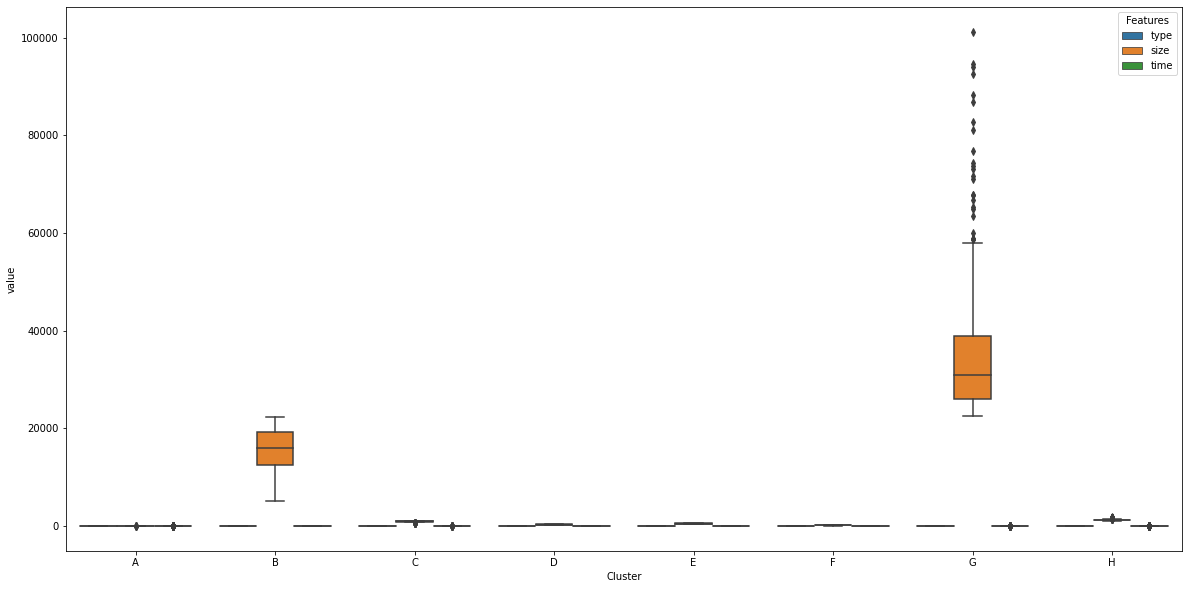

In [ ]:
dfA=clusterA.assign(Cluster='A')
dfB=clusterB.assign(Cluster='B')
dfC=clusterC.assign(Cluster='C')
dfD=clusterD.assign(Cluster='D')
dfE=clusterE.assign(Cluster='E')
dfF=clusterF.assign(Cluster='F')
dfG=clusterG.assign(Cluster='G')
dfH=clusterH.assign(Cluster='H')

dfs = pd.concat([dfA, dfB, dfC, dfD, dfE, dfF, dfG, dfH])
all_dfs = pd.melt(dfs, id_vars=['Cluster'] , var_name='Features')
plt.figure(figsize=(20,10))
sns.boxplot(x='Cluster', y='value', hue='Features', data=all_dfs)
plt.show()